<h1 style="text-align: center;">Credit Card Customer Segmentation</h1>

## In this project, i apply KMeans clustering to segment credit card customers based on their financial behavior and transaction patterns. I will analyze numerical features such as credit limit, purchase frequency, cash advance behavior, and payment patterns to discover natural groupings within the dataset.

### Imports and load data

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv("credit_card_customers.csv")

In [13]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### EDA - Exploratory Data Analysis

In [14]:
df.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [16]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [17]:
#remove customer ID column
df = df.drop(columns=["CUST_ID"])

In [18]:
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [19]:
#fill missing values with median
df["CREDIT_LIMIT"].fillna(df["CREDIT_LIMIT"].median(), inplace=True)
df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].median(), inplace=True)

In [20]:
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

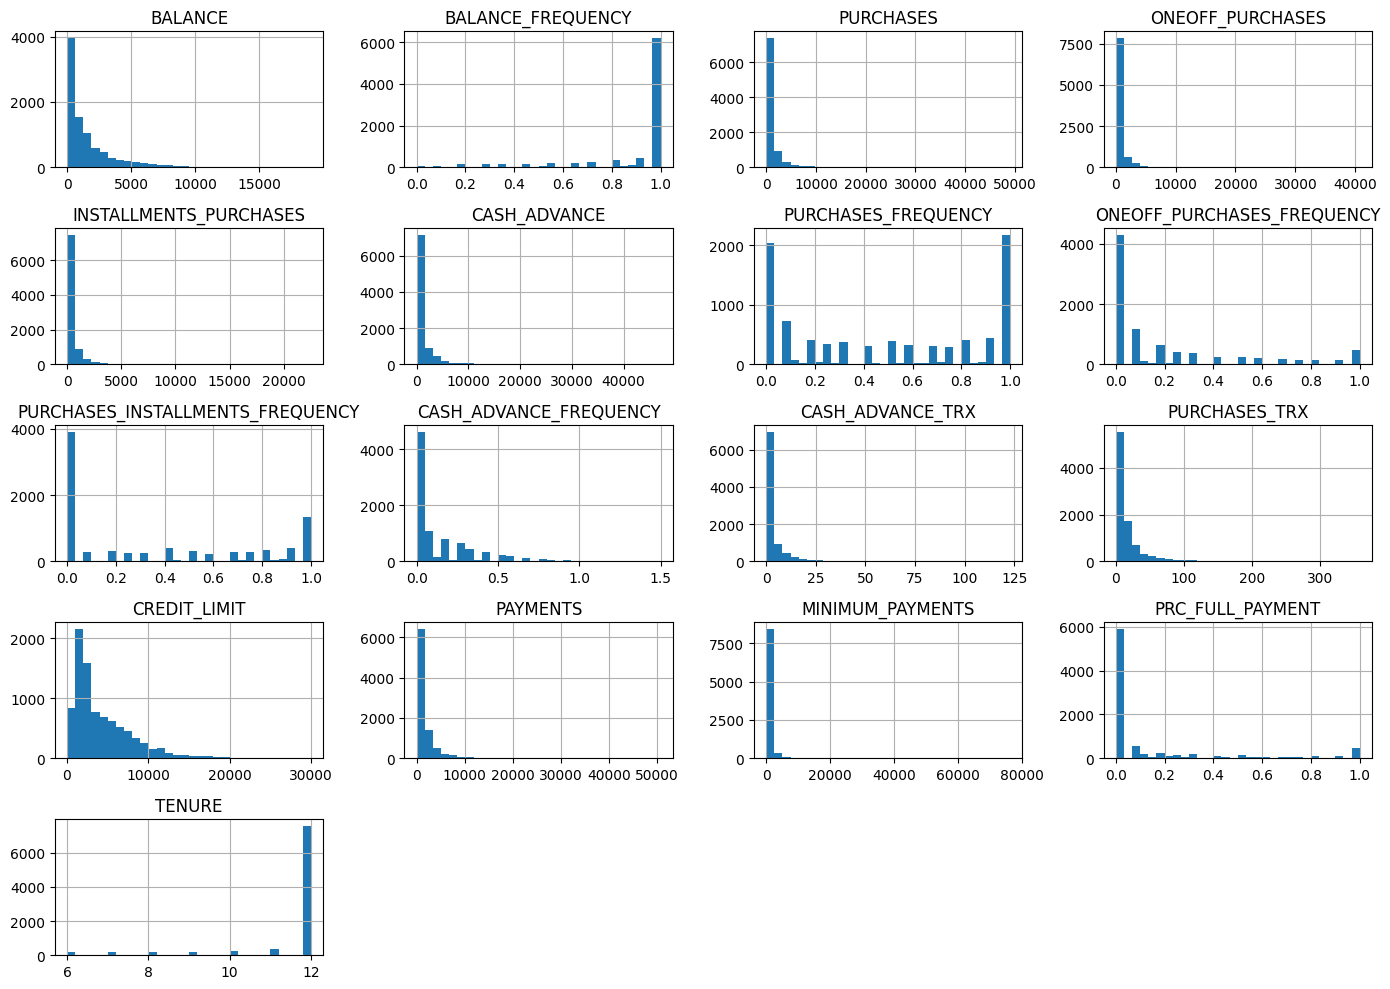

In [21]:
df.hist(figsize=(14,10), bins=30)
plt.tight_layout()
plt.show()

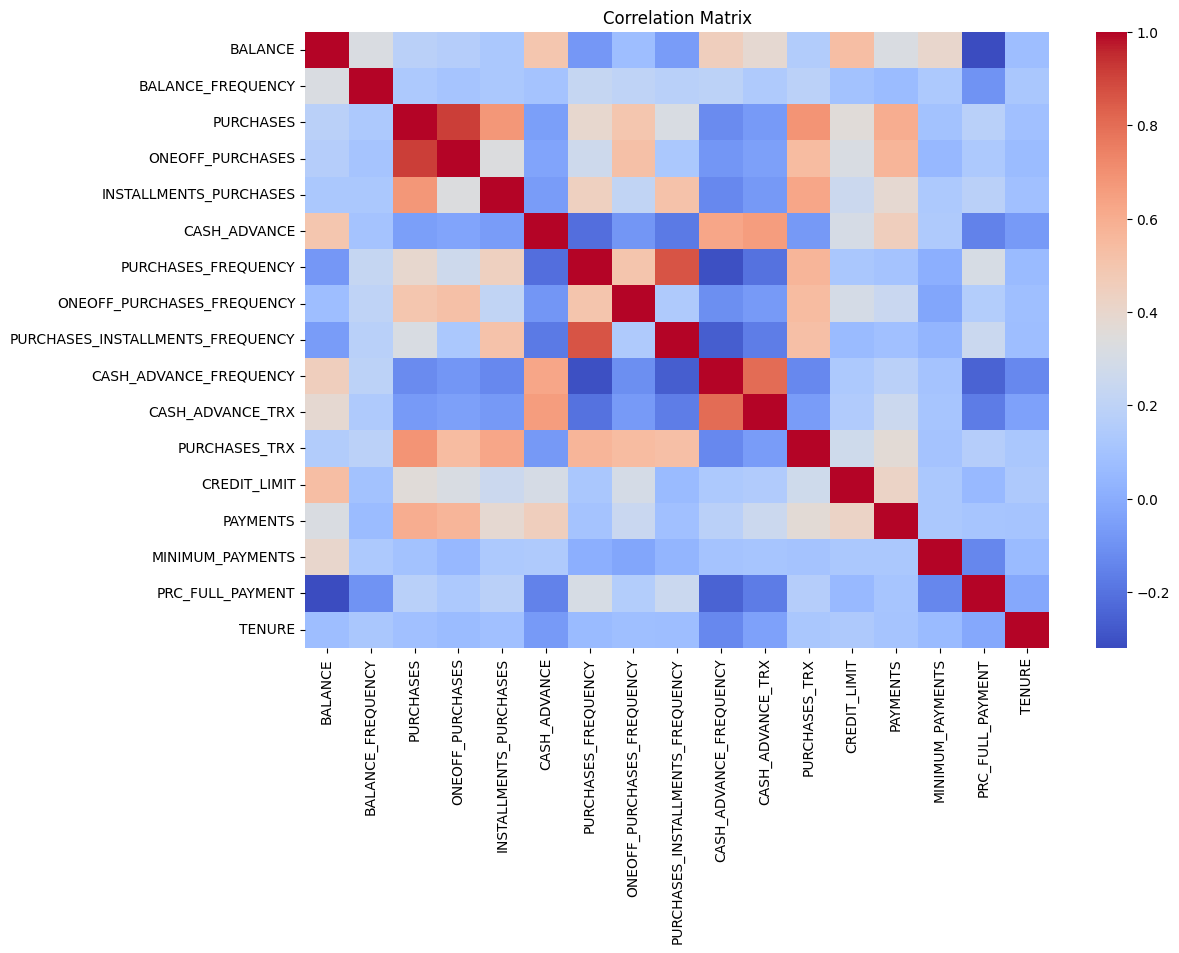

In [22]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

### Preprocessing

In [23]:
#apply log transformation to skewed financial features
skewed_features = [
    "BALANCE",
    "PURCHASES",
    "ONEOFF_PURCHASES",
    "INSTALLMENTS_PURCHASES",
    "CASH_ADVANCE",
    "PAYMENTS",
    "MINIMUM_PAYMENTS"
]

for col in skewed_features:
    df[col] = np.log1p(df[col])

In [24]:
#convert df to feature matrix
X = df.values

In [25]:
from sklearn.preprocessing import StandardScaler

#initialize scaler
scaler = StandardScaler()

#scale features
X_scaled = scaler.fit_transform(X)

In [27]:
X_scaled.mean(axis=0)

array([ 1.27024400e-17,  2.28643919e-16,  6.98634198e-17,  2.54048799e-17,
        1.58780500e-18,  5.71609799e-17, -1.84185380e-16, -8.89170798e-17,
        4.60463449e-17,  5.55731749e-17, -2.54048799e-17, -2.54048799e-17,
        1.27024400e-16,  3.55668319e-16, -2.15941479e-16,  0.00000000e+00,
        2.79453679e-16])

In [28]:
X_scaled.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

### Modeling

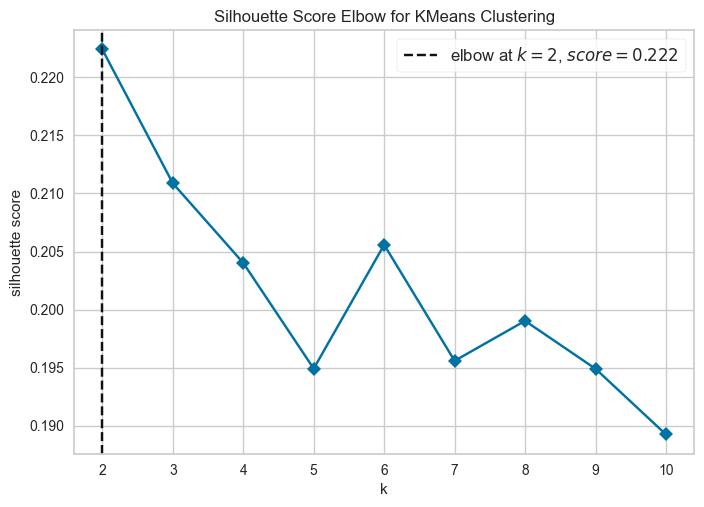

In [32]:
#silhouette score
vis = KElbowVisualizer(
    km,
    k=(2, 11),
    metric="silhouette",
    timings=False,
    force_model=True
)

vis.fit(X_scaled)
vis.show();

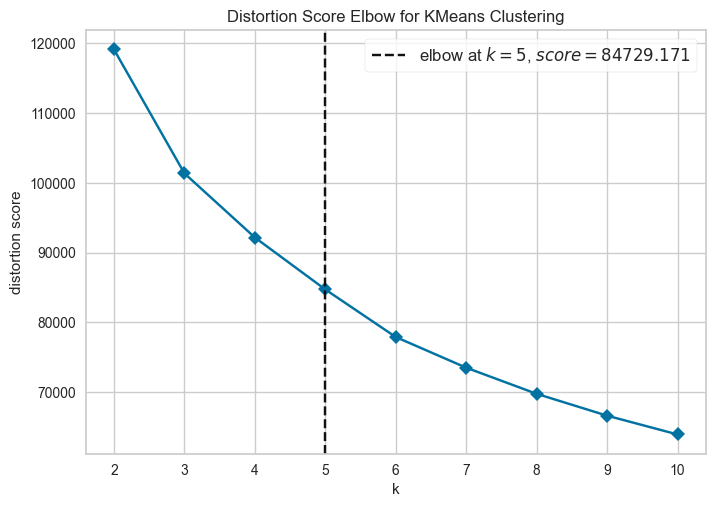

In [30]:
#elbow method using Yellowbrick
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

km = KMeans(random_state=42, n_init=10)

vis = KElbowVisualizer(
    km,
    k=(2, 11),
    metric="distortion",
    timings=False,
    force_model=True
)

vis.fit(X_scaled)
vis.show();

In [33]:
#train final KMeans model with k=5
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)

kmeans.fit(X_scaled)

#assign cluster labels
df["Cluster"] = kmeans.labels_

In [34]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,3.735304,0.818182,4.568506,0.000000,4.568506,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,5.312231,4.945277,0.000000,12,1
1,8.071989,0.909091,0.000000,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,8.319725,6.978531,0.222222,12,0
2,7.822504,1.000000,6.651791,6.651791,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,6.434654,6.442994,0.000000,12,4
3,7.419183,0.636364,7.313220,7.313220,0.000000,5.331694,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,5.747301,0.000000,12,4
4,6.707735,1.000000,2.833213,2.833213,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,6.521114,5.504483,0.000000,12,4


In [35]:
df["Cluster"].value_counts()

Cluster
0    2509
3    2029
4    1749
2    1570
1    1093
Name: count, dtype: int64

In [36]:
from sklearn.decomposition import PCA

#reduce dimensions to 2 for visualization
pca = PCA(n_components=2)

X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca["Cluster"] = df["Cluster"]

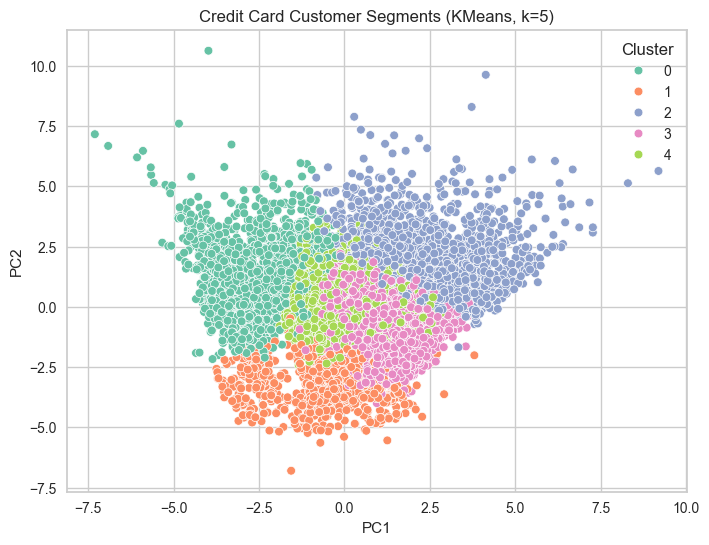

In [37]:
plt.figure(figsize=(8,6))

sns.scatterplot(
    data=df_pca,
    x="PC1",
    y="PC2",
    hue="Cluster",
    palette="Set2",
    s=40
)

plt.title("Credit Card Customer Segments (KMeans, k=5)")
plt.show()

In [38]:
#calculate mean values
cluster_profile = df.groupby("Cluster").mean()

cluster_profile

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Cluster,,,,,,,,,,,,,,,,,
0,7.457977,0.941932,1.331526,0.943339,0.561888,7.110001,0.070559,0.031565,0.036809,0.324060,8.066959,1.196891,4525.377127,6.860670,6.465126,0.031063,11.390594
1,2.727576,0.354983,4.315761,2.125706,2.594017,1.274749,0.268780,0.064973,0.193265,0.026262,0.498628,3.926807,3513.116804,5.050823,4.637523,0.206605,11.258005
2,7.215667,0.983877,7.823939,6.971023,6.565346,2.924836,0.935873,0.602361,0.763035,0.122540,3.233758,49.785987,7474.956572,7.807091,6.381688,0.212186,11.859873
3,5.247422,0.937078,6.215549,1.302264,6.106203,1.040739,0.833010,0.044548,0.784356,0.030961,0.559389,14.995564,3030.330784,6.337388,5.558956,0.289374,11.448497
4,6.562454,0.945826,6.231550,5.946951,1.750653,2.155446,0.433579,0.357741,0.096455,0.064359,1.189251,9.015437,4085.533032,6.540863,5.923797,0.086745,11.633505


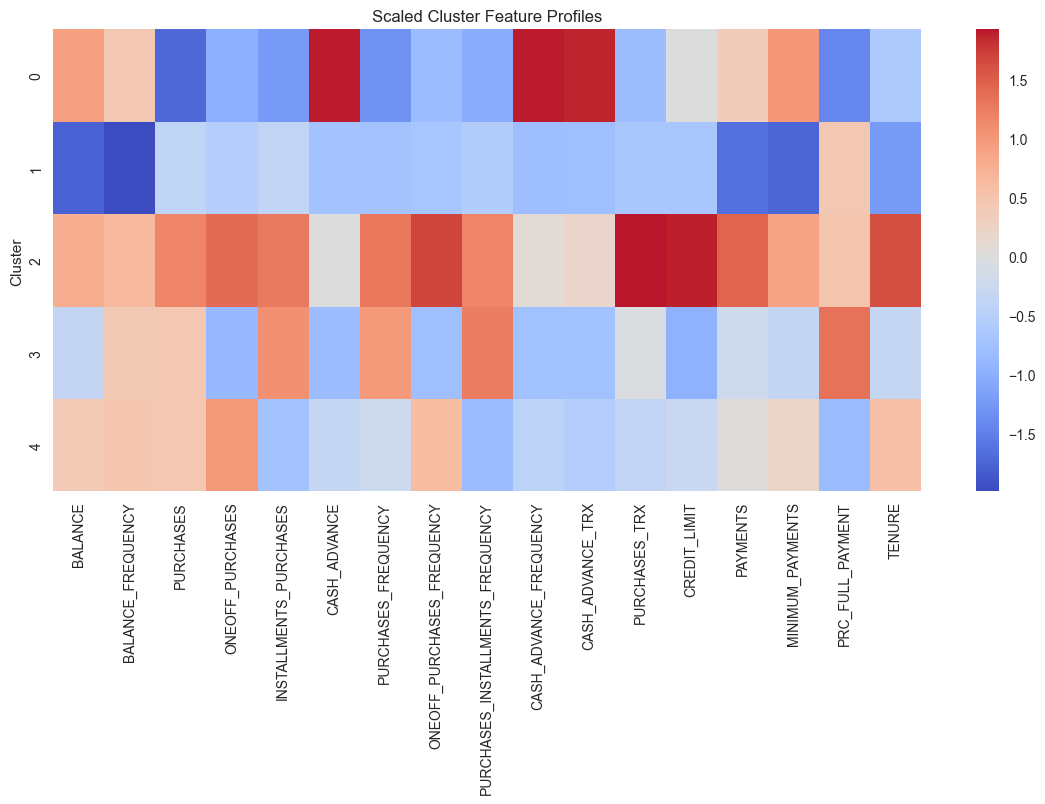

In [40]:
from sklearn.preprocessing import StandardScaler

#calculate cluster means
cluster_profile = df.groupby("Cluster").mean()

#scale the cluster profile for visualization
scaler_vis = StandardScaler()
cluster_profile_scaled = scaler_vis.fit_transform(cluster_profile)

cluster_profile_scaled = pd.DataFrame(
    cluster_profile_scaled,
    index=cluster_profile.index,
    columns=cluster_profile.columns
)

#heatmap
plt.figure(figsize=(14,6))
sns.heatmap(cluster_profile_scaled, cmap="coolwarm", center=0)
plt.title("Scaled Cluster Feature Profiles")
plt.show()

## Although the silhouette score suggested a simpler 2-cluster structure, the elbow method indicated that 5 clusters provide a more meaningful and business-relevant segmentation. After applying log transformation and feature scaling, KMeans successfully identified five distinct customer segments, including: High-value active customers,Low-activity conservative users, Cash-advance dependent customers, Installment-based revolving users, Balanced mid-level customers. This segmentation demonstrates how unsupervised learning can uncover hidden behavioral patterns in financial datasets, enabling improved risk assessment and targeted marketing strategies.

In [41]:
import os
os.makedirs("models", exist_ok=True)

In [42]:
#save trained KMeans model and scaler
import joblib

joblib.dump(kmeans, "models/kmeans_credit_card.joblib")
joblib.dump(scaler, "models/scaler_credit_card.joblib")

['models/scaler_credit_card.joblib']

In [43]:
#save feature order used during training
import json

feature_list = list(df.drop(columns=["Cluster"]).columns)

with open("models/feature_list.json", "w") as f:
    json.dump(feature_list, f)

In [44]:
os.listdir("models")

['feature_list.json', 'scaler_credit_card.joblib', 'kmeans_credit_card.joblib']